<a href="https://colab.research.google.com/github/viniciusgushiken/evasao_ensino_superior/blob/main/evasao_ensino_superior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Evasão Ensino Superior/Dados/fluxo_da_educacao_2017_21.csv')

In [4]:
df.head()

Código da Instituição                  Nome da Instituição  \
0                      1  UNIVERSIDADE FEDERAL DE MATO GROSSO   
1                      1  UNIVERSIDADE FEDERAL DE MATO GROSSO   
2                      1  UNIVERSIDADE FEDERAL DE MATO GROSSO   
3                      1  UNIVERSIDADE FEDERAL DE MATO GROSSO   
4                      1  UNIVERSIDADE FEDERAL DE MATO GROSSO   

   Categoria Administrativa  Organização Acadêmica  \
0                         1                      1   
1                         1                      1   
2                         1                      1   
3                         1                      1   
4                         1                      1   

   Código do Curso de Graduação Nome do Curso de Graduação  \
0                             1                    DIREITO   
1                             1                    DIREITO   
2                             1                    DIREITO   
3                             1                    DIREITO   
4                             1                    DIREITO   

   Código da Região Geográfica do Curso  \
0                                   5.0   
1                                   5.0   
2                                   5.0   
3                                   5.0   
4                                   5.0   

   Código da Unidade Federativa do Curso  Código do Município do Curso  \
0                                   51.0                     5103403.0   
1                                   51.0                     5103403.0   
2                                   51.0                     5103403.0   
3                                   51.0                     5103403.0   
4                                   51.0                     5103403.0   

   Grau Acadêmico  ...  Quantidade de Ingressantes no Curso  \
0               1  ...                                   95   
1               1  ...                                   95   
2               1  ...                                   95   
3               1  ...                                   95   
4               1  ...                                   95   

  Quantidade de Permanência no Curso no ano de referência  \
0                                                 94        
1                                                 91        
2                                                 89        
3                                                 54        
4                                                 49        

  Quantidade de Concluintes no Curso no ano de referência  \
0                                                  0        
1                                                  1        
2                                                  1        
3                                                 35        
4                                                  5        

   Quantidade de Desistência no Curso no ano de referência  \
0                                                  1         
1                                                  2         
2                                                  1         
3                                                  0         
4                                                  0         

  Quantidade de Falecimentos no Curso no ano de referência  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Taxa de Permanência - TAP  Taxa de Conclusão Acumulada - TCA  \
0                       98,9                                0,0   
1                       95,8                                1,1   
2                       93,7                                2,1   
3                       56,8                               38,9   
4               

In [12]:
# Definindo uma função para categorizar as instituições como públicas ou privadas
def categorize_institution(row):
    # Categorias 4 e 5 da coluna Categoria Administrativa significam que elas são Públicas
    if row in [4, 5]:
        return "Privada"
    else:
        return "Publica"

# Aplicando a função para criar uma nova coluna 'Tipo de Instituição'
df['Tipo de Instituição'] = df['Categoria Administrativa'].apply(categorize_institution)

# Exibindo as primeiras linhas com a nova coluna
df[['Nome da Instituição', 'Categoria Administrativa', 'Tipo de Instituição']].head()

Nome da Instituição  Categoria Administrativa  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO                         1   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO                         1   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO                         1   
3  UNIVERSIDADE FEDERAL DE MATO GROSSO                         1   
4  UNIVERSIDADE FEDERAL DE MATO GROSSO                         1   

  Tipo de Instituição  
0             Publica  
1             Publica  
2             Publica  
3             Publica  
4             Publica

In [13]:
# Contando a quantidade de instituições distintas para cada tipo (Pública e Privada)
instituicoes_distintas = df.groupby('Tipo de Instituição')['Nome da Instituição'].nunique()
instituicoes_distintas

Tipo de Instituição
Privada    1991
Publica     296
Name: Nome da Instituição, dtype: int64

In [14]:
# Total de Instituições de Ensino Superior no Brasil em 2017
len(df["Nome da Instituição"].unique())

2287

In [17]:
# Separar o df em Instituições Publicas e Privadas

# Filtrando o dataset para incluir apenas instituições privadas
df_privadas = df[df['Tipo de Instituição'] == 'Privada']

# Exibindo o dataset filtrado para Instituições Privadas
df_privadas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108825 entries, 3715 to 153919
Data columns (total 32 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Código da Instituição                                               108825 non-null  int64  
 1   Nome da Instituição                                                 108825 non-null  object 
 2   Categoria Administrativa                                            108825 non-null  int64  
 3   Organização Acadêmica                                               108825 non-null  int64  
 4   Código do Curso de Graduação                                        108825 non-null  int64  
 5   Nome do Curso de Graduação                                          108825 non-null  object 
 6   Código da Região Geográfica do Curso                                100990 non-null  float64
 7  

In [25]:
# Filtrando o dataset para 'Ano de Ingresso' e 'Ano de Referência' igual a 2017
ingressantes_2017 = df_privadas[(df_privadas['Ano de Ingresso'] == 2017) & (df_privadas['Ano de Referência'] == 2017)]

# Calculando a quantidade de alunos ingressantes por instituição
quantidade_ingressantes_por_instituicao = ingressantes_2017.groupby('Nome da Instituição')['Quantidade de Ingressantes no Curso'].sum()

# Ordenando as instituições pela quantidade de ingressantes
quantidade_ingressantes_por_instituicao = quantidade_ingressantes_por_instituicao.sort_values(ascending=False)

# Top 20 instituições de numero de ingressantes
quantidade_ingressantes_por_instituicao.head(20)


Nome da Instituição
UNIVERSIDADE PAULISTA                                        217913
Universidade Pitágoras Unopar Anhanguera                     212488
UNIVERSIDADE ANHANGUERA                                      128428
UNIVERSIDADE ESTÁCIO DE SÁ                                   113535
CENTRO UNIVERSITÁRIO INTERNACIONAL                           100151
UNIVERSIDADE NOVE DE JULHO                                    69963
CENTRO UNIVERSITÁRIO LEONARDO DA VINCI                        63629
UNIVERSIDADE CESUMAR                                          39980
CENTRO UNIVERSITÁRIO ESTÁCIO DE RIBEIRÃO PRETO                33608
UNIVERSIDADE CIDADE DE SÃO PAULO                              33570
UNIVERSIDADE ANHEMBI MORUMBI                                  32548
UNIVERSIDADE DE FRANCA                                        31020
UNIVERSIDADE CRUZEIRO DO SUL                                  28608
CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITANAS UNIDAS     27111
CENTRO UNIVERSITÁRIO FAEL   

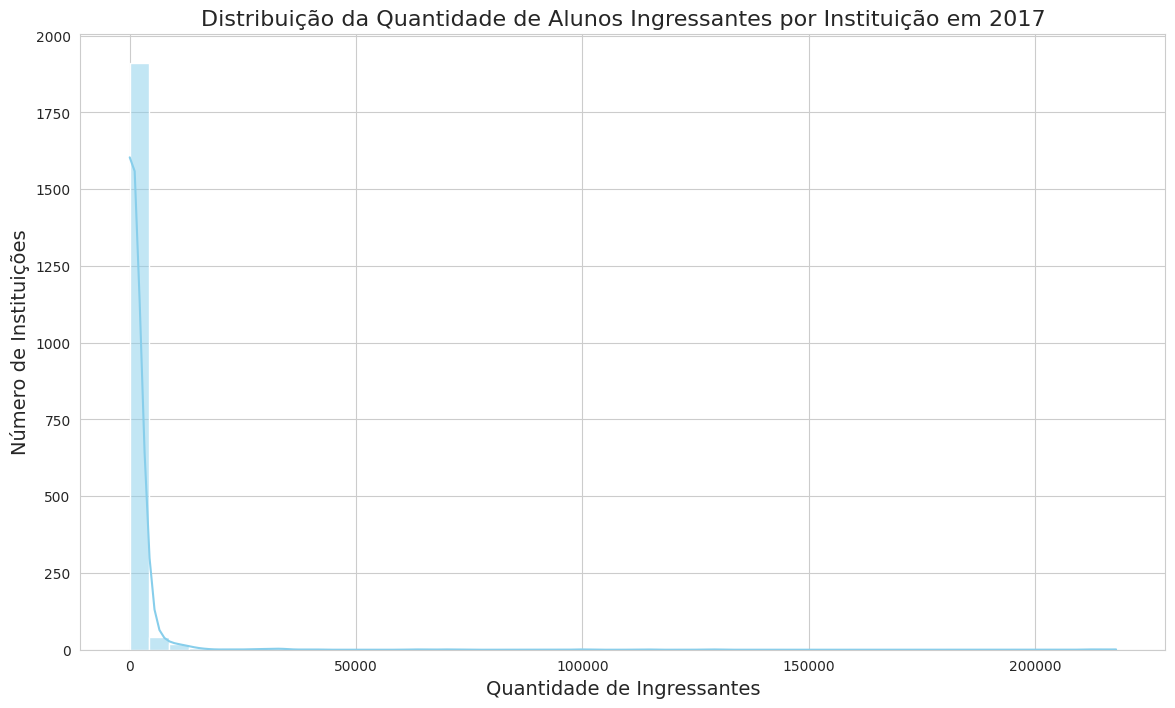

In [27]:
# Configurando o estilo do seaborn
sns.set_style("whitegrid")

# Criando o plot
plt.figure(figsize=(14, 8))
sns.histplot(quantidade_ingressantes_por_instituicao, bins=50, kde=True, color='skyblue')

# Definindo títulos e labels
plt.title("Distribuição da Quantidade de Alunos Ingressantes por Instituição em 2017", fontsize=16)
plt.xlabel("Quantidade de Ingressantes", fontsize=14)
plt.ylabel("Número de Instituições", fontsize=14)
plt.show()


In [28]:
quantidade_ingressantes_por_instituicao.describe()

count      1991.000000
mean       1358.467102
std        8730.688089
min           4.000000
25%          84.000000
50%         247.000000
75%         761.000000
max      217913.000000
Name: Quantidade de Ingressantes no Curso, dtype: float64

<ipython-input-37-11c1b884b189>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingressantes_2017['Região Geográfica'] = ingressantes_2017['Código da Região Geográfica do Curso'].map(regioes_map)


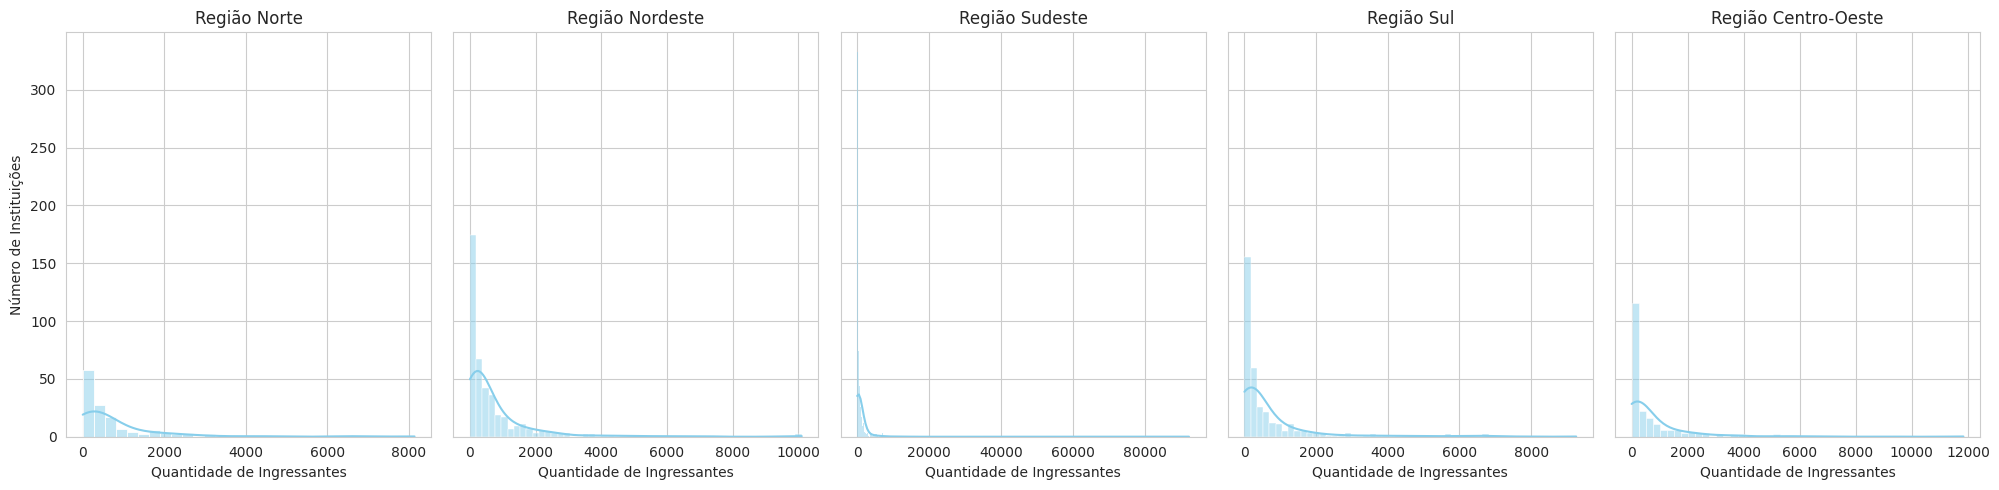

In [37]:
# Mapeando os códigos da região geográfica para seus respectivos nomes
regioes_map = {
    1: "Região Norte",
    2: "Região Nordeste",
    3: "Região Sudeste",
    4: "Região Sul",
    5: "Região Centro-Oeste"
}

ingressantes_2017['Região Geográfica'] = ingressantes_2017['Código da Região Geográfica do Curso'].map(regioes_map)

# Agrupando os dados por instituição e região para obter a quantidade total de ingressantes por instituição em 2017
grouped_data = ingressantes_2017.groupby(['Nome da Instituição', 'Código da Região Geográfica do Curso'])['Quantidade de Ingressantes no Curso'].sum().reset_index()

# Configurando o layout dos gráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plotando a distribuição de ingressantes por região em gráficos separados
for i, (region_code, region_name) in enumerate(regioes_map.items()):
    data_region = grouped_data[grouped_data['Código da Região Geográfica do Curso'] == region_code]
    sns.histplot(data=data_region, x='Quantidade de Ingressantes no Curso', ax=axes[i], color='skyblue', kde=True)
    axes[i].set_title(region_name)
    axes[i].set_xlabel("Quantidade de Ingressantes")
    if i == 0:
        axes[i].set_ylabel("Número de Instituições")

plt.tight_layout()
plt.show()


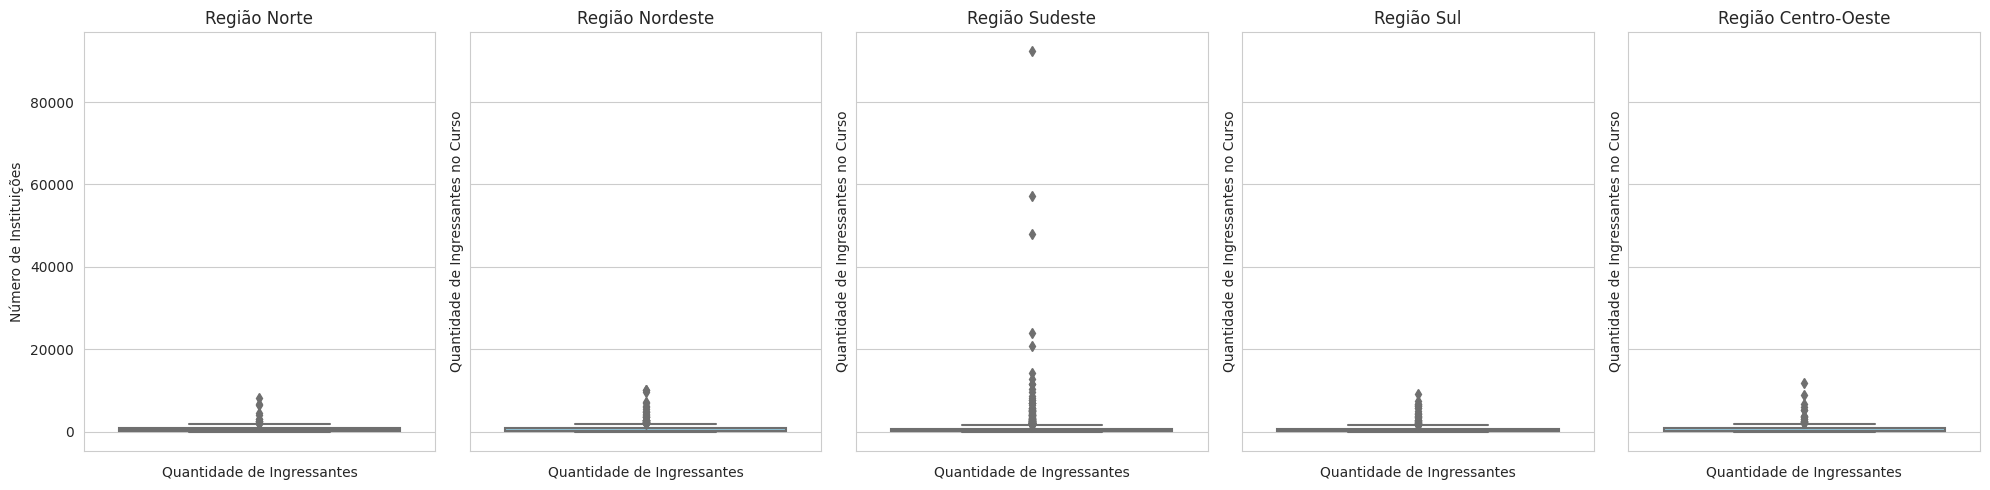

In [38]:
# Configurando o layout dos gráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plotando os boxplots de ingressantes por região em gráficos separados
for i, (region_code, region_name) in enumerate(regioes_map.items()):
    data_region = grouped_data[grouped_data['Código da Região Geográfica do Curso'] == region_code]
    sns.boxplot(y=data_region['Quantidade de Ingressantes no Curso'], ax=axes[i], color='skyblue')
    axes[i].set_title(region_name)
    axes[i].set_xlabel("Quantidade de Ingressantes")
    if i == 0:
        axes[i].set_ylabel("Número de Instituições")

plt.tight_layout()
plt.show()


In [40]:
# Aplicando a função describe() na coluna 'Quantidade de Ingressantes no Curso' agrupada por região com os dados agrupados por instituição
describe_grouped_data = grouped_data.groupby('Código da Região Geográfica do Curso')['Quantidade de Ingressantes no Curso'].describe()

# Substituindo o índice numérico pelo nome das regiões para melhor visualização
describe_grouped_data.index = describe_grouped_data.index.map(regioes_map)

describe_grouped_data

count         mean          std  min  \
Código da Região Geográfica do Curso                                         
Região Norte                          136.0   783.382353  1260.693695  4.0   
Região Nordeste                       429.0   743.958042  1284.869724  4.0   
Região Sudeste                        879.0  1001.819113  4343.803855  4.0   
Região Sul                            343.0   692.125364  1288.310346  4.0   
Região Centro-Oeste                   208.0   762.764423  1442.389566  4.0   

                                         25%    50%     75%      max  
Código da Região Geográfica do Curso                                  
Região Norte                          126.25  360.0  826.75   8143.0  
Região Nordeste                        98.00  296.0  819.00  10105.0  
Região Sudeste                         78.00  224.0  731.00  92300.0  
Região Sul                             72.00  216.0  685.50   9254.0  
Região Centro-Oeste                    79.50  212.5  830.50  11840.0

In [49]:
 regiao = grouped_data.groupby('Código da Região Geográfica do Curso')['Quantidade de Ingressantes no Curso'].sum()
 regiao.index = regiao.index.map(regioes_map)
 regiao.sort_values(ascending=False)

Código da Região Geográfica do Curso
Região Sudeste         880599
Região Nordeste        319158
Região Sul             237399
Região Centro-Oeste    158655
Região Norte           106540
Name: Quantidade de Ingressantes no Curso, dtype: int64

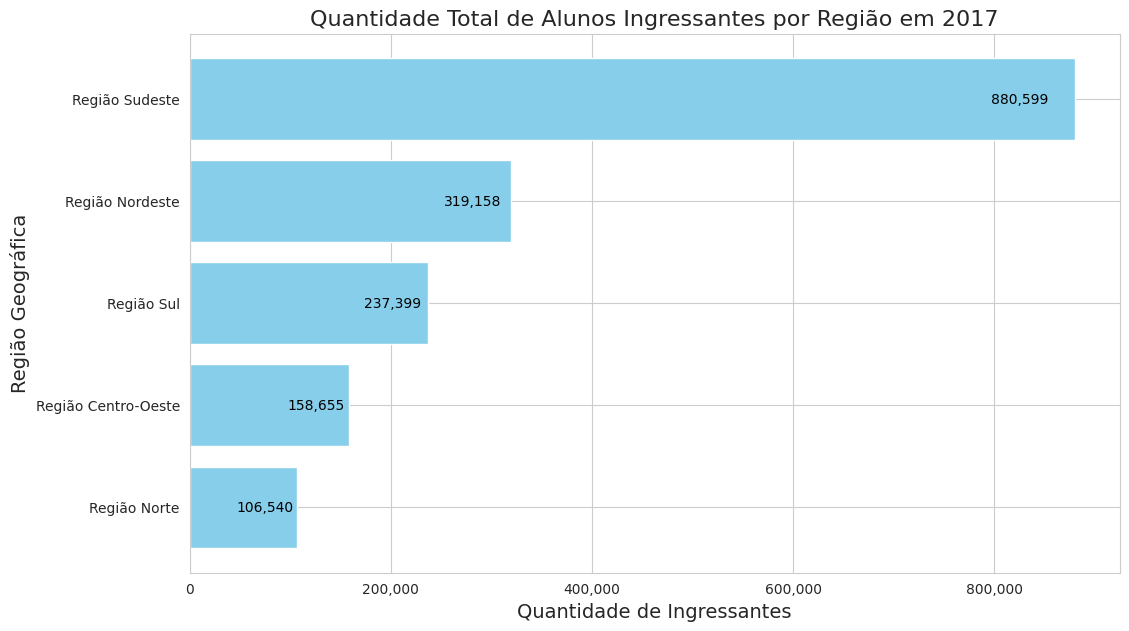

In [51]:
# Ordenando os valores de ingressantes por região em ordem decrescente
sorted_ingressantes_por_regiao = ingressantes_por_regiao.sort_values(ascending=True)

# Plotando o gráfico de barras com labels nas barras
plt.figure(figsize=(12, 7))
bars = plt.barh(sorted_ingressantes_por_regiao.index, sorted_ingressantes_por_regiao.values, color='skyblue')

# Adicionando labels nas barras
for bar in bars:
    plt.text(bar.get_width() - (0.03 * bar.get_width()), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}',
             va='center', ha='right', color='black', fontsize=10)

# Definindo títulos, labels e formatando o eixo x
plt.title("Quantidade Total de Alunos Ingressantes por Região em 2017", fontsize=16)
plt.xlabel("Quantidade de Ingressantes", fontsize=14)
plt.ylabel("Região Geográfica", fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


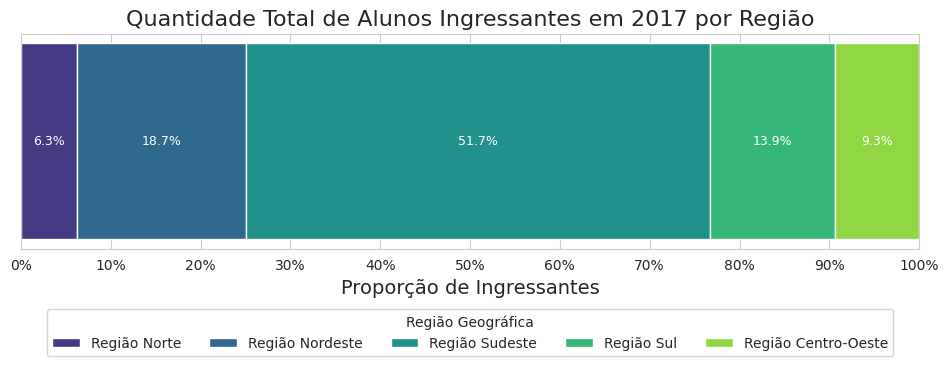

In [57]:
# Agrupando os dados apenas por região para obter a quantidade total de ingressantes por região em 2017
total_ingressantes_por_regiao = grouped_data.groupby('Código da Região Geográfica do Curso')['Quantidade de Ingressantes no Curso'].sum()

# Substituindo o índice numérico pelo nome das regiões para melhor visualização
total_ingressantes_por_regiao.index = total_ingressantes_por_regiao.index.map(regioes_map)

# Preparando os dados para o gráfico de barras empilhadas
total_ingressantes = total_ingressantes_por_regiao.sum()
proportions = total_ingressantes_por_regiao / total_ingressantes


# Plotando o gráfico de barras empilhadas horizontalmente com formatação no eixo x
plt.figure(figsize=(10, 4))
left_value = 0
colors = sns.color_palette("viridis", 5)

for idx, (region, value) in enumerate(proportions.items()):
    plt.barh(0, value, left=left_value, color=colors[idx], label=region, height=0.3)
    plt.text(left_value + value/2, 0, f'{value*100:.1f}%', va='center', ha='center', color='white', fontsize=9)
    left_value += value

# Definindo títulos, labels, formatando o eixo x e otimizando a visualização
plt.title("Quantidade Total de Alunos Ingressantes em 2017 por Região", fontsize=16)
plt.xlabel("Proporção de Ingressantes", fontsize=14)
plt.xlim(0, 1)
plt.yticks([])
plt.xticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.legend(title="Região Geográfica", loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.tight_layout()
plt.show()



In [67]:
mackenzie_data

Código da Instituição                   Nome da Instituição  \
7045                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7046                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7047                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7048                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7049                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
...                     ...                                   ...   
7260                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7261                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7262                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7263                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   
7264                     22  UNIVERSIDADE PRESBITERIANA MACKENZIE   

      Categoria Administrativa  Organização Acadêmica  \
7045                         5                      1   
7046                         5                      1   
7047                         5                      1   
7048                         5                      1   
7049                         5                      1   
...                        ...                    ...   
7260                         5                      1   
7261                         5                      1   
7262                         5                      1   
7263                         5                      1   
7264                         5                      1   

      Código do Curso de Graduação Nome do Curso de Graduação  \
7045                          2007                    QUÍMICA   
7046                          2007                    QUÍMICA   
7047                          2007                    QUÍMICA   
7048                          2007                    QUÍMICA   
7049                          2007                    QUÍMICA   
...                            ...                        ...   
7260                       1382647                 MATEMÁTICA   
7261                       1382647                 MATEMÁTICA   
7262                       1382647                 MATEMÁTICA   
7263                       1382647                 MATEMÁTICA   
7264                       1382647                 MATEMÁTICA   

      Código da Região Geográfica do Curso  \
7045                                   3.0   
7046                                   3.0   
7047                                   3.0   
7048                                   3.0   
7049                                   3.0   
...                                    ...   
7260                                   NaN   
7261                                   NaN   
7262                                   NaN   
7263                                   NaN   
7264                                   NaN   

      Código da Unidade Federativa do Curso  Código do Município do Curso  \
7045                                   35.0                     3550308.0   
7046                                   35.0                     3550308.0   
7047                                   35.0                     3550308.0   
7048                                   35.0                     3550308.0   
7049                                   35.0                     3550308.0   
...                                     ...                           ...   
7260                                    NaN                           NaN   
7261                                    NaN                           NaN   
7262                                    NaN                           NaN   
7263                                    NaN                           NaN   
7264                                    NaN                           NaN   

      Grau Acadêmico  ...  \
7045               2  ...   
7046               2  ...   
7047               2  ...   
7048               2  ...   
7049               2  ...   
...              ...  ...   
7260               2  ...   
7

<ipython-input-74-981a2931e2bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mackenzie_data['Taxa de Permanência - TAP'] = (mackenzie_data['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)


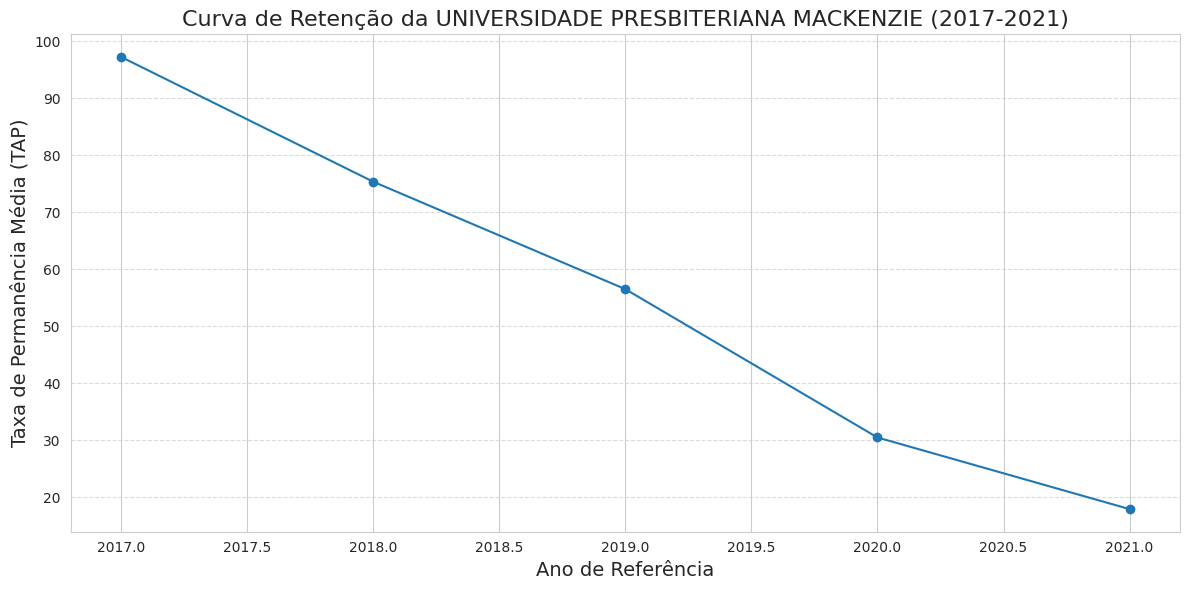

In [74]:
# Filtrando os dados para a "UNIVERSIDADE PRESBITERIANA MACKENZIE"
mackenzie_data = df[df['Nome da Instituição'] == 'UNIVERSIDADE PRESBITERIANA MACKENZIE']

# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas
mackenzie_data['Taxa de Permanência - TAP'] = (mackenzie_data['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Recalculando a Taxa de Permanência Média (TAP) para todos os cursos por "Ano de Referência"
average_tap_per_year = mackenzie_data.groupby('Ano de Referência')['Taxa de Permanência - TAP'].mean()

# Plotando a curva de retenção novamente
plt.figure(figsize=(12, 6))
average_tap_per_year.plot(marker='o', linestyle='-')

# Definindo títulos e labels
plt.title("Curva de Retenção da UNIVERSIDADE PRESBITERIANA MACKENZIE (2017-2021)", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-76-580f25d52199>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index


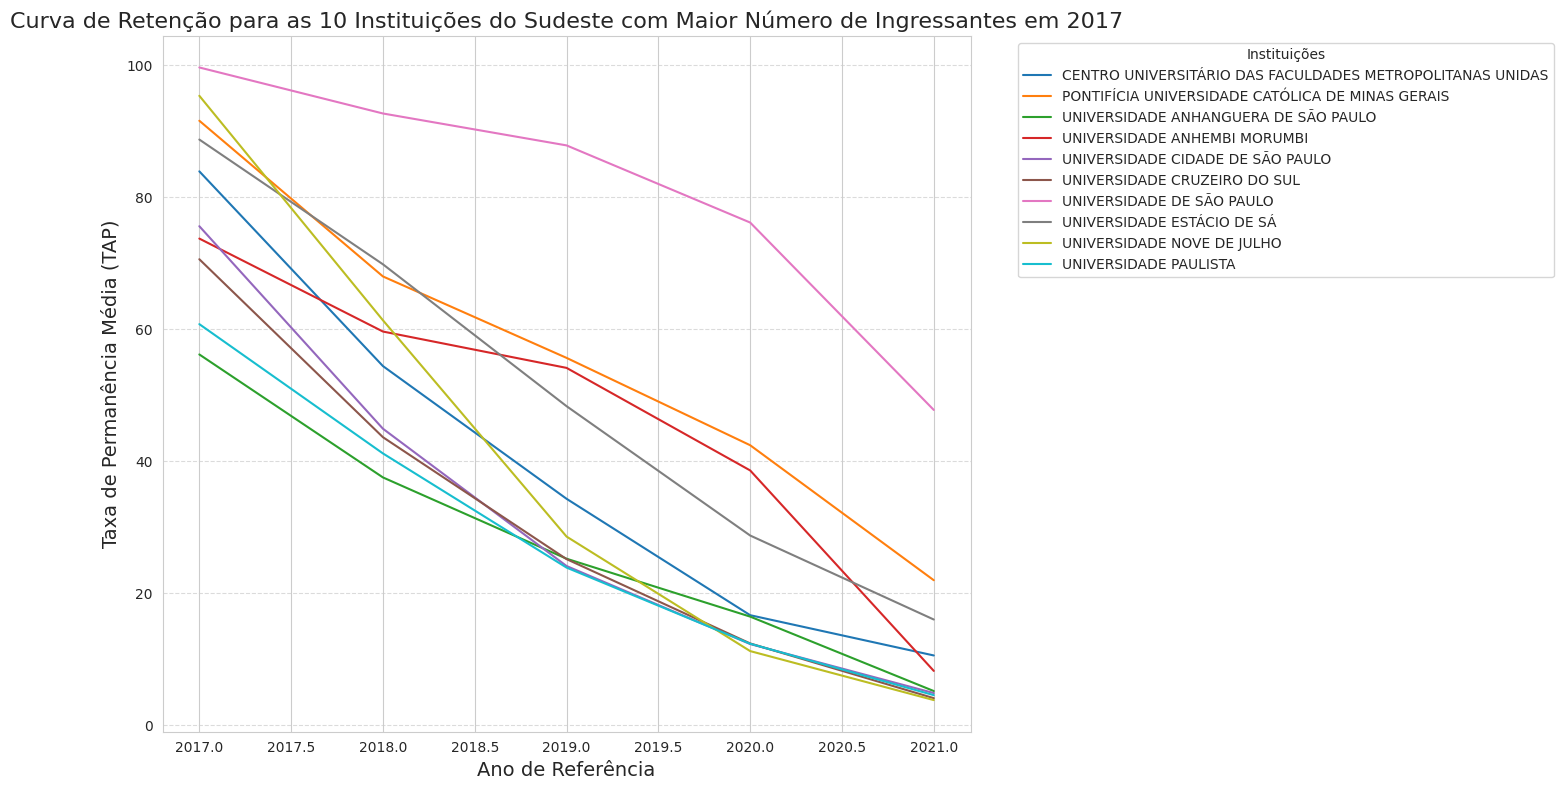

In [76]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017)]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index

# Filtrar o conjunto de dados original para essas 10 instituições
top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = top_10_data.groupby(['Nome da Instituição', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack()

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as 10 Instituições do Sudeste com Maior Número de Ingressantes em 2017", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-87-ff03c2922148>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index


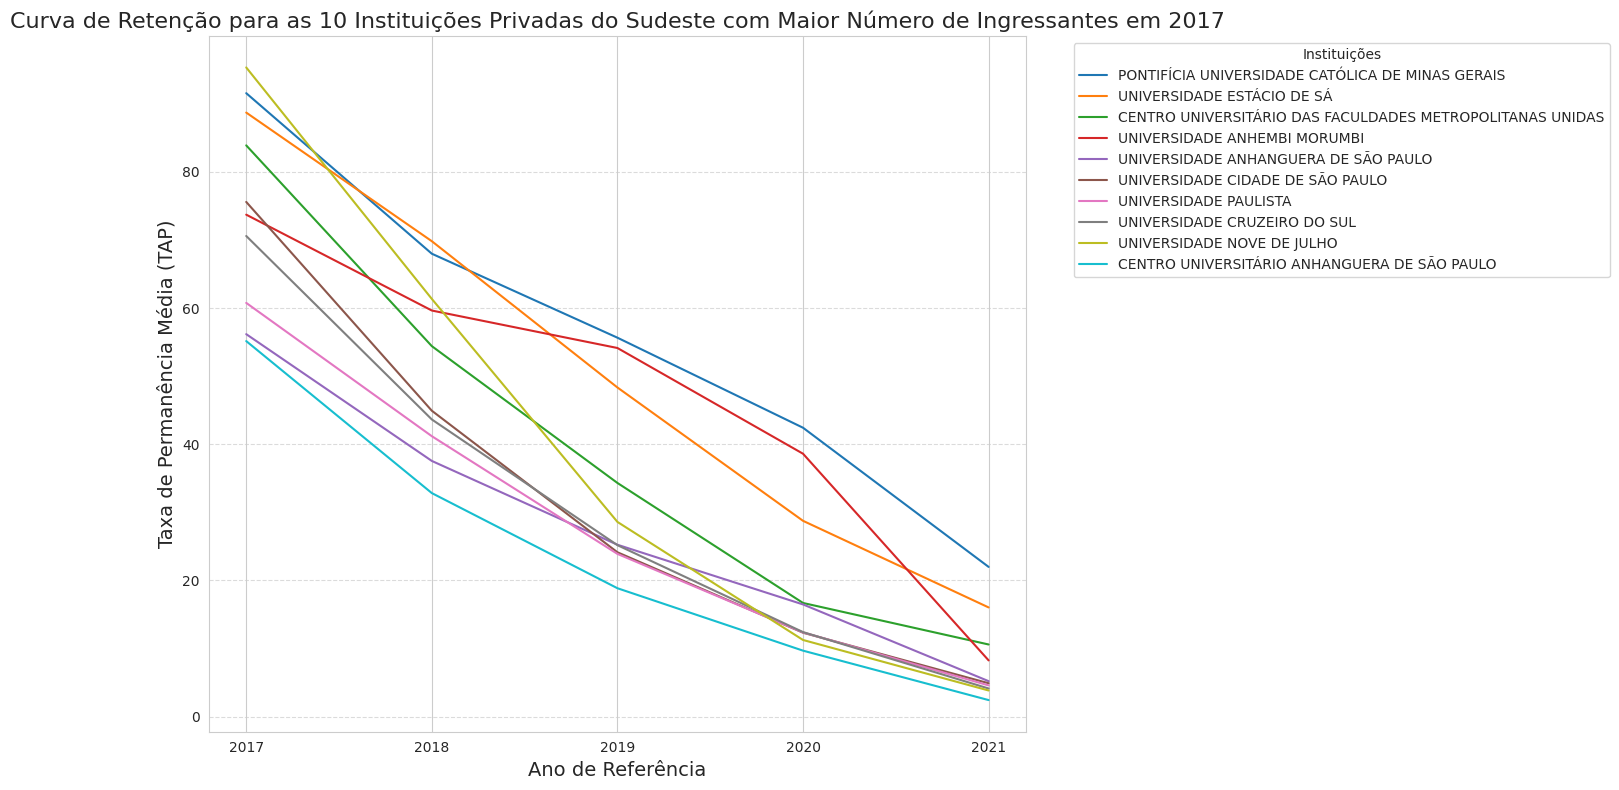

In [87]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
# df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017) & (df['Tipo de Instituição'] == 'Privada')]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index

# Filtrar o conjunto de dados original para essas 10 instituições
top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = top_10_data.groupby(['Nome da Instituição', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack().sort_values(by=2021,ascending=False)

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as 10 Instituições Privadas do Sudeste com Maior Número de Ingressantes em 2017", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.xticks(average_tap_per_year_top_10.columns.astype(int))
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [88]:
average_tap_per_year_top_10

Ano de Referência                                        2017       2018  \
Nome da Instituição                                                        
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS    91.565254  67.988983   
UNIVERSIDADE ESTÁCIO DE SÁ                          88.715206  69.826546   
CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITA...  83.899065  54.415888   
UNIVERSIDADE ANHEMBI MORUMBI                        73.723438  59.646875   
UNIVERSIDADE ANHANGUERA DE SÃO PAULO                56.176923  37.557692   
UNIVERSIDADE CIDADE DE SÃO PAULO                    75.593023  44.931395   
UNIVERSIDADE PAULISTA                               60.767505  41.190700   
UNIVERSIDADE CRUZEIRO DO SUL                        70.592982  43.648246   
UNIVERSIDADE NOVE DE JULHO                          95.341667  61.350379   
CENTRO UNIVERSITÁRIO ANHANGUERA DE SÃO PAULO        55.157759  32.835345   

Ano de Referência                                        2019       2020  \
Nome da Instituição                                                        
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS    55.656780  42.432203   
UNIVERSIDADE ESTÁCIO DE SÁ                          48.344845  28.762113   
CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITA...  34.323364  16.699065   
UNIVERSIDADE ANHEMBI MORUMBI                        54.142969  38.615625   
UNIVERSIDADE ANHANGUERA DE SÃO PAULO                25.250962  16.483654   
UNIVERSIDADE CIDADE DE SÃO PAULO                    24.144186  12.332558   
UNIVERSIDADE PAULISTA                               23.906674  12.380088   
UNIVERSIDADE CRUZEIRO DO SUL                        25.188596  12.421053   
UNIVERSIDADE NOVE DE JULHO                          28.602273  11.264015   
CENTRO UNIVERSITÁRIO ANHANGUERA DE SÃO PAULO        18.863793   9.696552   

Ano de Referência                                        2021  
Nome da Instituição                                            
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS    21.993220  
UNIVERSIDADE ESTÁCIO DE SÁ                          16.042784  
CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITA...  10.601869  
UNIVERSIDADE ANHEMBI MORUMBI                         8.263281  
UNIVERSIDADE ANHANGUERA DE SÃO PAULO                 5.214423  
UNIVERSIDADE CIDADE DE SÃO PAULO                     4.909302  
UNIVERSIDADE PAULISTA                                4.594530  
UNIVERSIDADE CRUZEIRO DO SUL                         4.136842  
UNIVERSIDADE NOVE DE JULHO                           3.845076  
CENTRO UNIVERSITÁRIO ANHANGUERA DE SÃO PAULO         2.437069

In [82]:
top_50_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(50).index

# Filtrar o conjunto de dados original para essas 10 instituições
top_50_data = df[df['Nome da Instituição'].isin(top_50_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_50 = top_50_data.groupby(['Nome da Instituição', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack()


<ipython-input-82-60be9d13f300>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_50_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(50).index


In [86]:
average_tap_per_year_top_50.sort_values(by=2021,ascending=False)

Ano de Referência                                        2017       2018  \
Nome da Instituição                                                        
CENTRO UNIVERSITÁRIO IBMR                           77.751724  71.065517   
UNIVERSIDADE METODISTA DE SÃO PAULO                 98.046552  83.622414   
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE CAMPINAS        96.125455  86.950909   
UNIVERSIDADE CASTELO BRANCO                         99.193750  84.114063   
CENTRO UNIVERSITÁRIO CELSO LISBOA                   81.276000  66.120000   
UNIVERSIDADE DO OESTE PAULISTA                      94.367925  87.464151   
PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JANEIRO  98.410638  82.987234   
UNIVERSIDADE VEIGA DE ALMEIDA                       96.927711  72.701205   
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS    91.565254  67.988983   
UNIVERSIDADE VILA VELHA                             99.422222  83.797222   
UNIVERSIDADE SÃO FRANCISCO                          89.471429  81.090476   
UNIVERSIDADE PRESBITERIANA MACKENZIE                97.277273  75.379545   
CENTRO UNIVERSITÁRIO UNICARIOCA                     90.822500  59.782500   
UNIVERSIDADE ESTÁCIO DE SÁ                          88.715206  69.826546   
CENTRO UNIVERSITÁRIO AUGUSTO MOTTA                  96.721818  73.210909   
Centro Universitário Estácio de Belo Horizonte ...  85.125000  67.764286   
UNIVERSIDADE DE UBERABA                             90.659259  62.946296   
UNIVERSIDADE IGUAÇU                                 77.565625  55.221875   
CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITA...  83.899065  54.415888   
FACULDADE PITÁGORAS DE UBERLÂNDIA                   73.704545  53.068182   
UNIVERSIDADE SÃO JUDAS TADEU                        79.958182  64.150909   
Faculdade Estácio de Carapicuíba                    84.750000  66.550000   
UNIVERSIDADE DE MOGI DAS CRUZES                     97.174074  67.220370   
UNIVERSIDADE DO GRANDE RIO PROFESSOR JOSÉ DE SO...  82.048684  62.165789   
UNIVERSIDADE CÂNDIDO MENDES                         86.711538  64.078846   
Centro Universitário Anhanguera Pitágoras Unopa...  64.425000  47.703125   
UNIVERSIDADE SALGADO DE OLIVEIRA                    86.719388  59.472449   
CENTRO UNIVERSITÁRIO DE BELO HORIZONTE              75.375439  51.015789   
UNIVERSIDADE DE SOROCABA                            78.791803  52.991803   
UNIVERSIDADE ANHEMBI MORUMBI                        73.723438  59.646875   
UNIVERSIDADE BRASIL                                 76.930435  59.108696   
FACULDADE PITÁGORAS DE BELO HORIZONTE               66.022667  45.902667   
FACULDADE ANHANGUERA DE GUARULHOS                   65.782143  43.560714   
UNIVERSIDADE SANTO AMARO                            86.758209  56.631343   
Centro Universitário Estácio de São Paulo           78.966000  58.166000   
FACULDADE ANHANGÜERA DE CAMPINAS                    67.975556  44.713333   
CENTRO UNIVERSITÁRIO UNA                            75.509434  47.138679   
Universidade Universus Veritas Guarulhos            82.772000  62.498667   
Centro Universitário das Américas                   89.050704  49.357746   
UNIVERSIDADE ANHANGUERA DE SÃO PAULO                56.176923  37.557692   
CENTRO UNIVERSITÁRIO ANHANGUERA PITÁGORAS AMPLI     53.931034  37.748276   
UNIVERSIDADE CIDADE DE SÃO PAULO                    75.593023  44.931395   
UNIVERSIDADE PAULISTA                               60.767505  41.190700   
UNIVERSIDADE CRUZEIRO DO SUL                        70.592982  43.648246   
UNIVERSIDADE DE FRANCA                              72.661538  42.386813   
UNIVERSIDADE NOVE DE JULHO                          95.341667  61.350379   
CENTRO UNIVERSITÁRIO NOSSA SENHORA DO PATROCÍNIO    70.351667  44.936667   
CENTRO UNIVERSITÁRIO ANHANGUERA DE SÃO PAULO        55.157759  32.835345   
FIAM-FAAM - CENTRO UNIVERSITÁRIO                    85.730435  47.352174   
CENTRO UNIVERSITÁRIO SUMARÉ                         73.931818  43.265909   

Ano de Referência                              

<ipython-input-91-b21ae612c6c1>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index


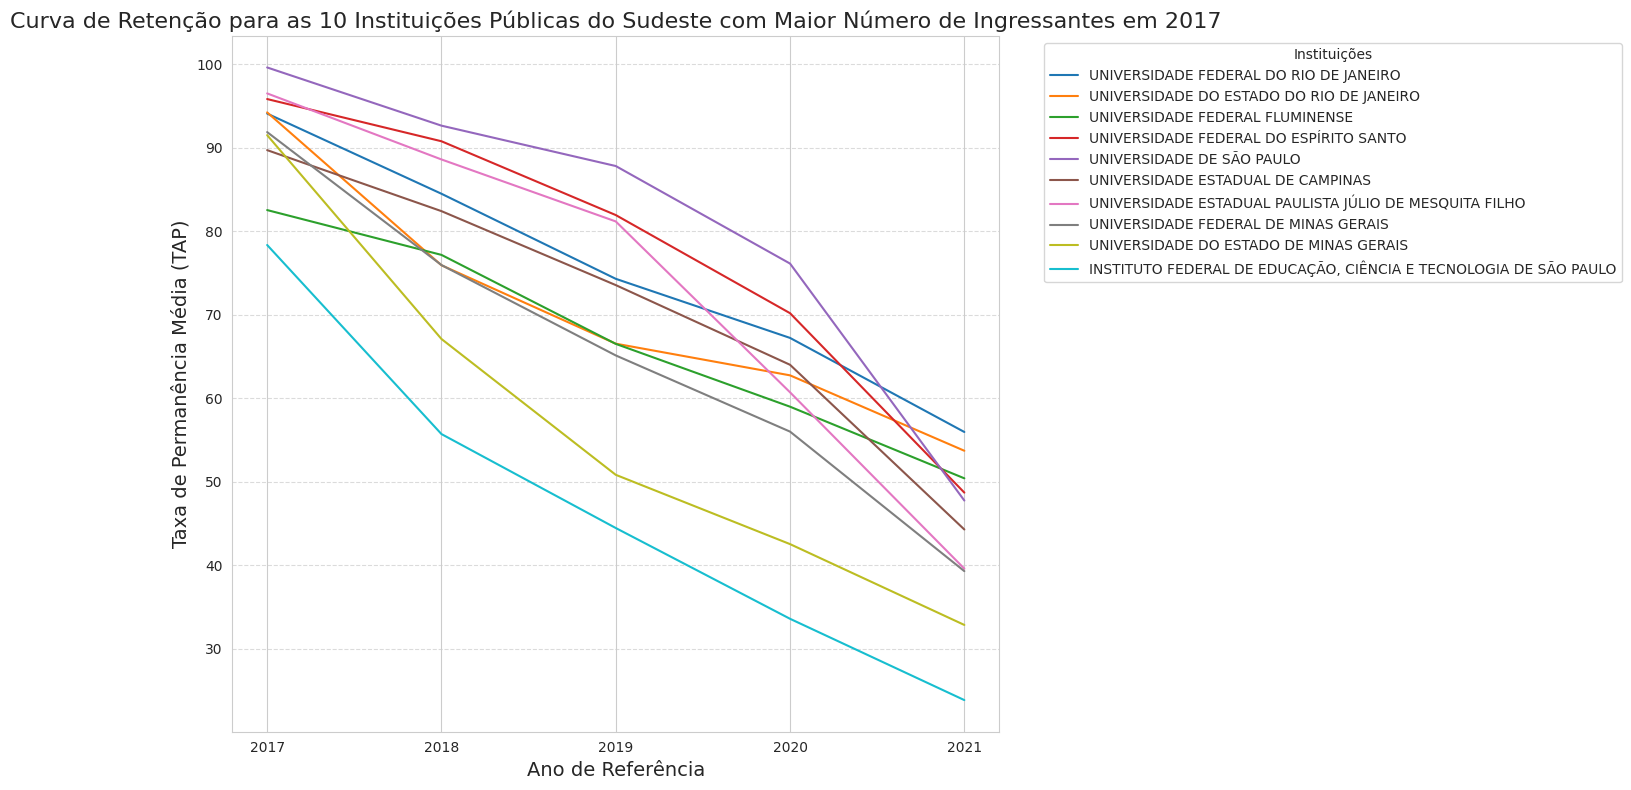

In [91]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
# df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017) & (df['Tipo de Instituição'] == 'Publica')]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index

# Filtrar o conjunto de dados original para essas 10 instituições
top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = top_10_data.groupby(['Nome da Instituição', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack().sort_values(by=2021,ascending=False)

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as 10 Instituições Públicas do Sudeste com Maior Número de Ingressantes em 2017", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.xticks(average_tap_per_year_top_10.columns.astype(int))
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [90]:
average_tap_per_year_top_10

Ano de Referência                                        2017       2018  \
Nome da Instituição                                                        
UNIVERSIDADE FEDERAL DO RIO DE JANEIRO              94.107639  84.508333   
UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO            94.251724  75.948276   
UNIVERSIDADE FEDERAL FLUMINENSE                     82.555039  77.189147   
UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO              95.848352  90.794505   
UNIVERSIDADE DE SÃO PAULO                           99.630244  92.662439   
UNIVERSIDADE ESTADUAL DE CAMPINAS                   89.732500  82.427500   
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUIT...  96.524176  88.616484   
UNIVERSIDADE FEDERAL DE MINAS GERAIS                91.890000  75.974444   
UNIVERSIDADE DO ESTADO DE MINAS GERAIS              91.525862  67.120690   
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOL...  78.372269  55.736134   

Ano de Referência                                        2019       2020  \
Nome da Instituição                                                        
UNIVERSIDADE FEDERAL DO RIO DE JANEIRO              74.324306  67.247222   
UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO            66.557471  62.765517   
UNIVERSIDADE FEDERAL FLUMINENSE                     66.534884  59.012403   
UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO              81.958242  70.207692   
UNIVERSIDADE DE SÃO PAULO                           87.829268  76.149268   
UNIVERSIDADE ESTADUAL DE CAMPINAS                   73.572500  64.030000   
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUIT...  81.194505  60.733516   
UNIVERSIDADE FEDERAL DE MINAS GERAIS                65.151111  56.027778   
UNIVERSIDADE DO ESTADO DE MINAS GERAIS              50.856034  42.558621   
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOL...  44.486555  33.615966   

Ano de Referência                                        2021  
Nome da Instituição                                            
UNIVERSIDADE FEDERAL DO RIO DE JANEIRO              55.984722  
UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO            53.737931  
UNIVERSIDADE FEDERAL FLUMINENSE                     50.435659  
UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO              48.724176  
UNIVERSIDADE DE SÃO PAULO                           47.775610  
UNIVERSIDADE ESTADUAL DE CAMPINAS                   44.310000  
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUIT...  39.619780  
UNIVERSIDADE FEDERAL DE MINAS GERAIS                39.322222  
UNIVERSIDADE DO ESTADO DE MINAS GERAIS              32.880172  
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOL...  23.882353

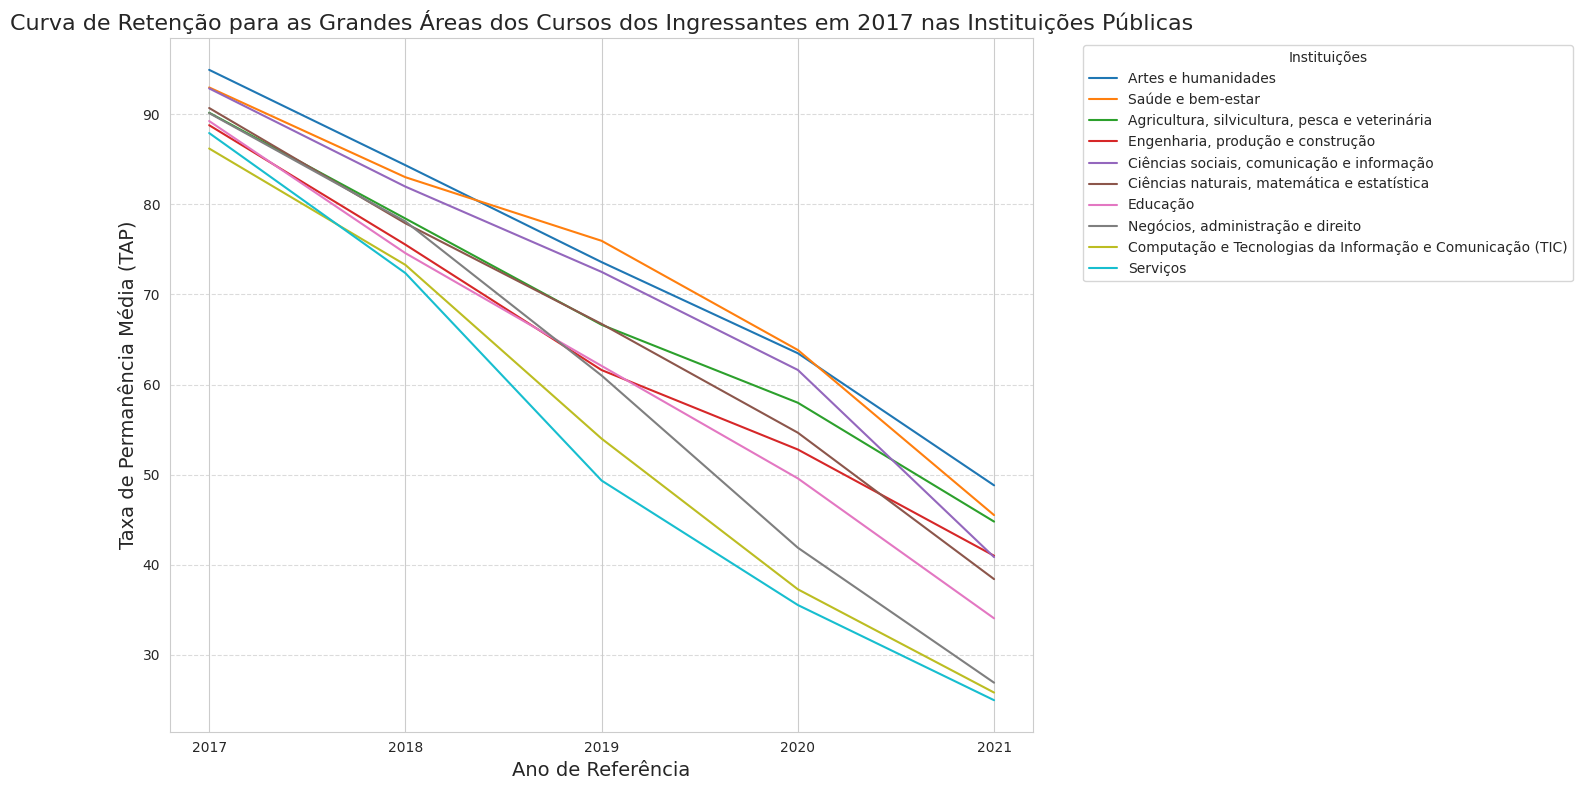

In [101]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
# df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017) & (df['Tipo de Instituição'] == 'Publica')]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
# top_10_institutions = sudeste_data_2017.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL').sum()

# Filtrar o conjunto de dados original para essas 10 instituições
# top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = sudeste_data_2017.groupby(['Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack().sort_values(by=2021,ascending=False)

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as Grandes Áreas dos Cursos dos Ingressantes em 2017 nas Instituições Públicas", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.xticks(average_tap_per_year_top_10.columns.astype(int))
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [102]:
average_tap_per_year_top_10

Ano de Referência                                        2017       2018  \
Nome da Grande Área do Curso segundo a classifi...                         
Artes e humanidades                                 94.944149  84.357447   
Saúde e bem-estar                                   92.989236  83.022569   
Agricultura, silvicultura, pesca e veterinária      90.186364  78.431818   
Engenharia, produção e construção                   88.798451  75.536145   
Ciências sociais, comunicação e informação          92.882941  81.977647   
Ciências naturais, matemática e estatística         90.706224  77.907054   
Educação                                            89.260610  74.590988   
Negócios, administração e direito                   90.140741  78.110101   
Computação e Tecnologias da Informação e Comuni...  86.208451  73.287324   
Serviços                                            87.926829  72.375610   

Ano de Referência                                        2019       2020  \
Nome da Grande Área do Curso segundo a classifi...                         
Artes e humanidades                                 73.594149  63.475532   
Saúde e bem-estar                                   75.959375  63.836458   
Agricultura, silvicultura, pesca e veterinária      66.635606  57.980303   
Engenharia, produção e construção                   61.608606  52.787263   
Ciências sociais, comunicação e informação          72.506471  61.621176   
Ciências naturais, matemática e estatística         66.729876  54.653527   
Educação                                            62.072238  49.579360   
Negócios, administração e direito                   61.000000  41.881481   
Computação e Tecnologias da Informação e Comuni...  53.991080  37.266197   
Serviços                                            49.339024  35.519512   

Ano de Referência                                        2021  
Nome da Grande Área do Curso segundo a classifi...             
Artes e humanidades                                 48.808511  
Saúde e bem-estar                                   45.501736  
Agricultura, silvicultura, pesca e veterinária      44.783333  
Engenharia, produção e construção                   40.989501  
Ciências sociais, comunicação e informação          40.841176  
Ciências naturais, matemática e estatística         38.395436  
Educação                                            34.041570  
Negócios, administração e direito                   26.895623  
Computação e Tecnologias da Informação e Comuni...  25.799531  
Serviços                                            24.951220

<ipython-input-97-731911f4a633>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


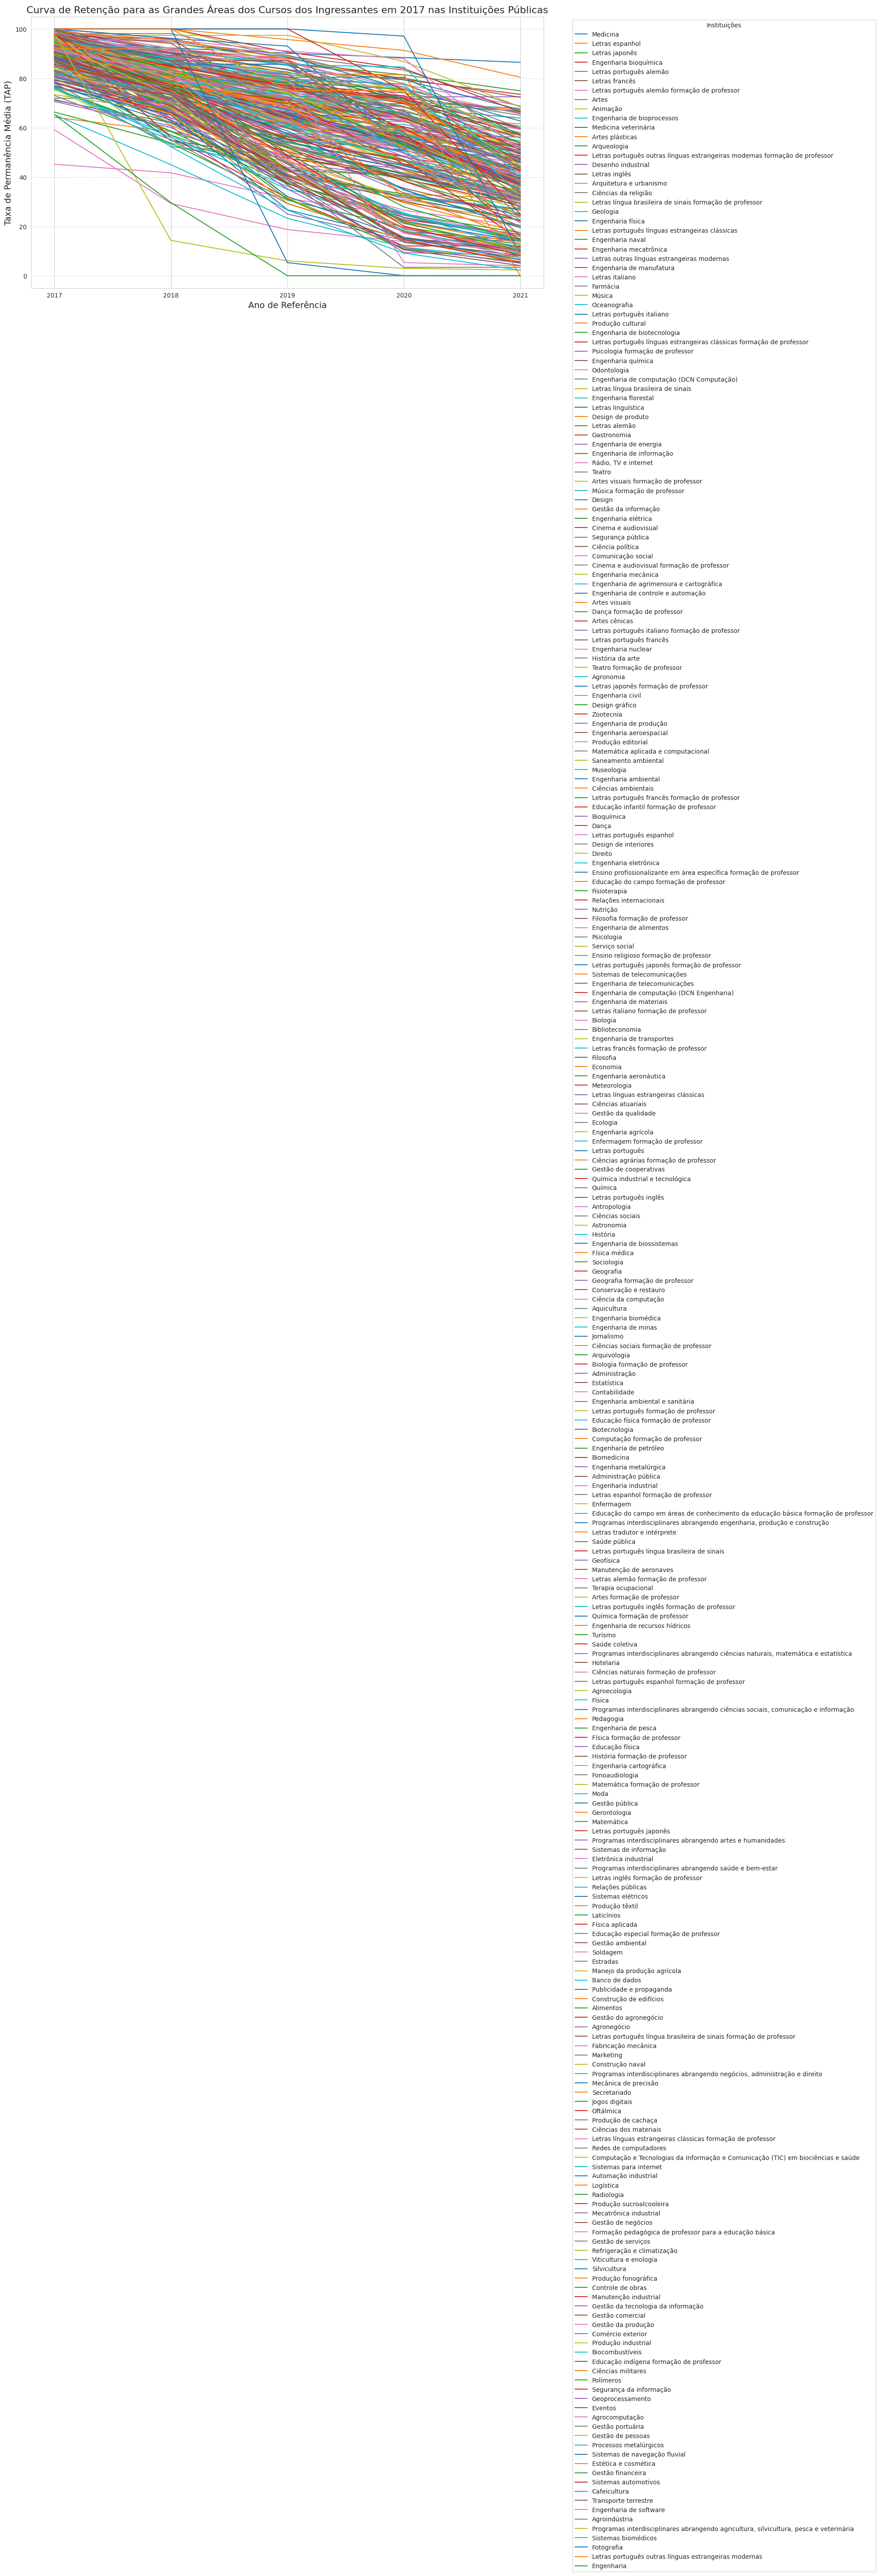

In [97]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
# df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017) & (df['Tipo de Instituição'] == 'Publica')]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
# top_10_institutions = sudeste_data_2017.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL').sum()

# Filtrar o conjunto de dados original para essas 10 instituições
# top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = sudeste_data_2017.groupby(['Nome da área do Curso segundo a classificação CINE BRASIL', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack().sort_values(by=2021,ascending=False)

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as Grandes Áreas dos Cursos dos Ingressantes em 2017 nas Instituições Públicas", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.xticks(average_tap_per_year_top_10.columns.astype(int))
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [99]:
average_tap_per_year_top_10.head(20)

Ano de Referência                                         2017        2018  \
Nome da área do Curso segundo a classificação C...                           
Medicina                                             95.397297   92.281081   
Letras espanhol                                     100.000000  100.000000   
Letras japonês                                      100.000000   92.100000   
Engenharia bioquímica                               100.000000   91.200000   
Letras português alemão                              95.000000   75.000000   
Letras francês                                      100.000000   96.150000   
Letras português alemão formação de professor        96.150000   84.600000   
Artes                                                98.100000   98.100000   
Animação                                             97.400000   97.400000   
Engenharia de bioprocessos                           94.400000   81.800000   
Medicina veterinária                                 96.321053   90.578947   
Artes plásticas                                      94.950000   84.300000   
Arqueologia                                          97.000000   78.800000   
Letras português outras línguas estrangeiras mo...  100.000000  100.000000   
Desenho industrial                                   92.300000   89.400000   
Letras inglês                                        96.050000   80.950000   
Arquitetura e urbanismo                              91.472727   85.059091   
Ciências da religião                                100.000000   82.500000   
Letras língua brasileira de sinais formação de ...   97.850000   86.950000   
Geologia                                             94.181818   84.490909   

Ano de Referência                                        2019       2020  \
Nome da área do Curso segundo a classificação C...                         
Medicina                                            90.154054  88.397297   
Letras espanhol                                     95.700000  91.300000   
Letras japonês                                      86.200000  81.400000   
Engenharia bioquímica                               88.200000  79.400000   
Letras português alemão                             75.000000  72.500000   
Letras francês                                      86.150000  80.000000   
Letras português alemão formação de professor       79.850000  77.450000   
Artes                                               88.900000  83.300000   
Animação                                            97.400000  86.800000   
Engenharia de bioprocessos                          74.060000  70.380000   
Medicina veterinária                                83.484211  79.373684   
Artes plásticas                                     75.100000  71.875000   
Arqueologia                                         69.700000  69.700000   
Letras português outras línguas estrangeiras mo...  90.625000  83.925000   
Desenho industrial                                  83.700000  72.100000   
Letras inglês                                       77.100000  74.100000   
Arquitetura e urbanismo                             78.981818  75.686364   
Ciências da religião                                75.000000  72.500000   
Letras língua brasileira de sinais formação de ...  79.050000  68.300000   
Geologia                                            78.600000  68.127273   

Ano de Referência                                        2021  
Nome da área do Curso segundo a classificação C...             
Medicina                                            86.459459  
Letras espanhol                                     80.400000  
Letras japonês                                      74.900000  
Engenharia bioquímica                               73.500000  
Letras português alemão                             72.500000  
Letras francês                                      72.300000  
Letras português alemão formação de professor       68.850000  
Artes                             

In [100]:
average_tap_per_year_top_10.tail(20)

Ano de Referência                                         2017        2018  \
Nome da área do Curso segundo a classificação C...                           
Segurança da informação                              85.600000   74.433333   
Geoprocessamento                                     70.600000   60.000000   
Eventos                                              86.616667   74.750000   
Agrocomputação                                       91.300000   82.500000   
Gestão portuária                                     81.600000   74.200000   
Gestão de pessoas                                    94.033333   72.983333   
Processos metalúrgicos                               65.266667   45.000000   
Sistemas de navegação fluvial                        79.500000   66.700000   
Estética e cosmética                                 84.666667   65.466667   
Gestão financeira                                    83.020000   66.100000   
Sistemas automotivos                                 78.000000   66.075000   
Cafeicultura                                         83.400000   66.950000   
Transporte terrestre                                 79.100000   73.450000   
Engenharia de software                               98.666667   88.600000   
Agroindústria                                        76.300000   69.500000   
Programas interdisciplinares abrangendo agricul...   98.500000   14.300000   
Sistemas biomédicos                                  86.250000   52.250000   
Fotografia                                          100.000000  100.000000   
Letras português outras línguas estrangeiras mo...  100.000000  100.000000   
Engenharia                                           65.300000   29.600000   

Ano de Referência                                        2019       2020  \
Nome da área do Curso segundo a classificação C...                         
Segurança da informação                             48.633333  20.133333   
Geoprocessamento                                    38.800000   9.400000   
Eventos                                             38.983333  13.600000   
Agrocomputação                                      43.800000  17.500000   
Gestão portuária                                    46.000000  13.500000   
Gestão de pessoas                                   31.616667  10.550000   
Processos metalúrgicos                              23.266667  11.533333   
Sistemas de navegação fluvial                       32.100000  15.400000   
Estética e cosmética                                29.333333  14.600000   
Gestão financeira                                   31.100000  10.900000   
Sistemas automotivos                                43.075000  14.600000   
Cafeicultura                                        35.150000  11.400000   
Transporte terrestre                                36.800000  10.500000   
Engenharia de software                              80.600000   5.333333   
Agroindústria                                       39.000000   3.400000   
Programas interdisciplinares abrangendo agricul...   6.000000   3.000000   
Sistemas biomédicos                                 26.600000   9.150000   
Fotografia                                           5.300000   0.000000   
Letras português outras línguas estrangeiras mo...  75.000000  75.000000   
Engenharia                                           0.000000   0.000000   

Ano de Referência                                       2021  
Nome da área do Curso segundo a classificação C...            
Segurança da informação                             8.233333  
Geoprocessamento                                    8.200000  
Eventos                                             8.183333  
Agrocomputação                                      7.500000  
Gestão portuária                                    7.400000  
Gestão de pessoas                                   7.316667  
Processos metalúrgicos                              6.700000  
Sistemas de navegação fluvial              

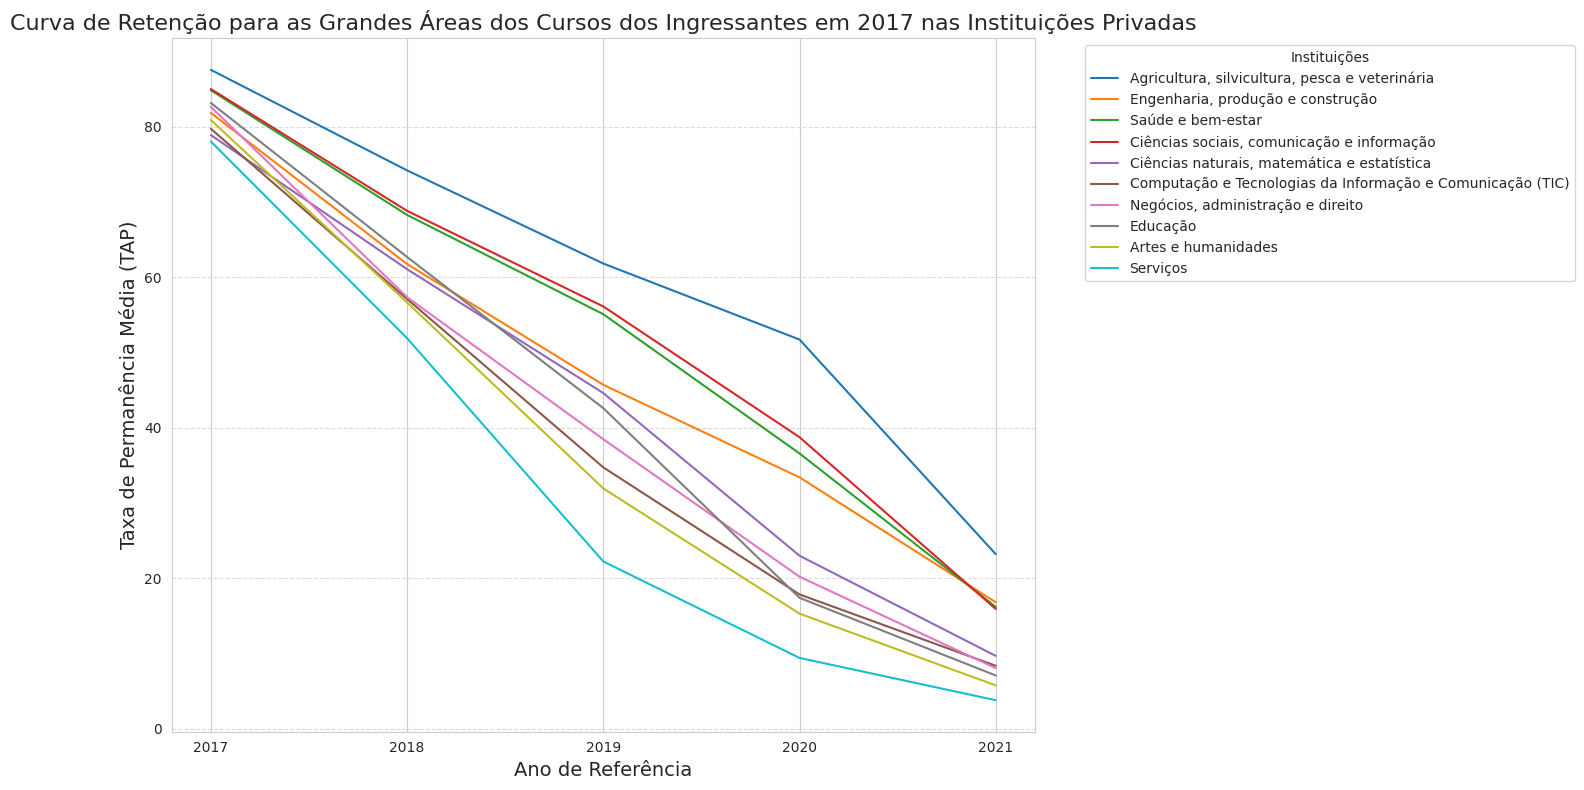

In [105]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
# df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017) & (df['Tipo de Instituição'] == 'Privada')]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
# top_10_institutions = sudeste_data_2017.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL').sum()

# Filtrar o conjunto de dados original para essas 10 instituições
# top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = sudeste_data_2017.groupby(['Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack().sort_values(by=2021,ascending=False)

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as Grandes Áreas dos Cursos dos Ingressantes em 2017 nas Instituições Privadas", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.xticks(average_tap_per_year_top_10.columns.astype(int))
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-106-76a36b031268>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index


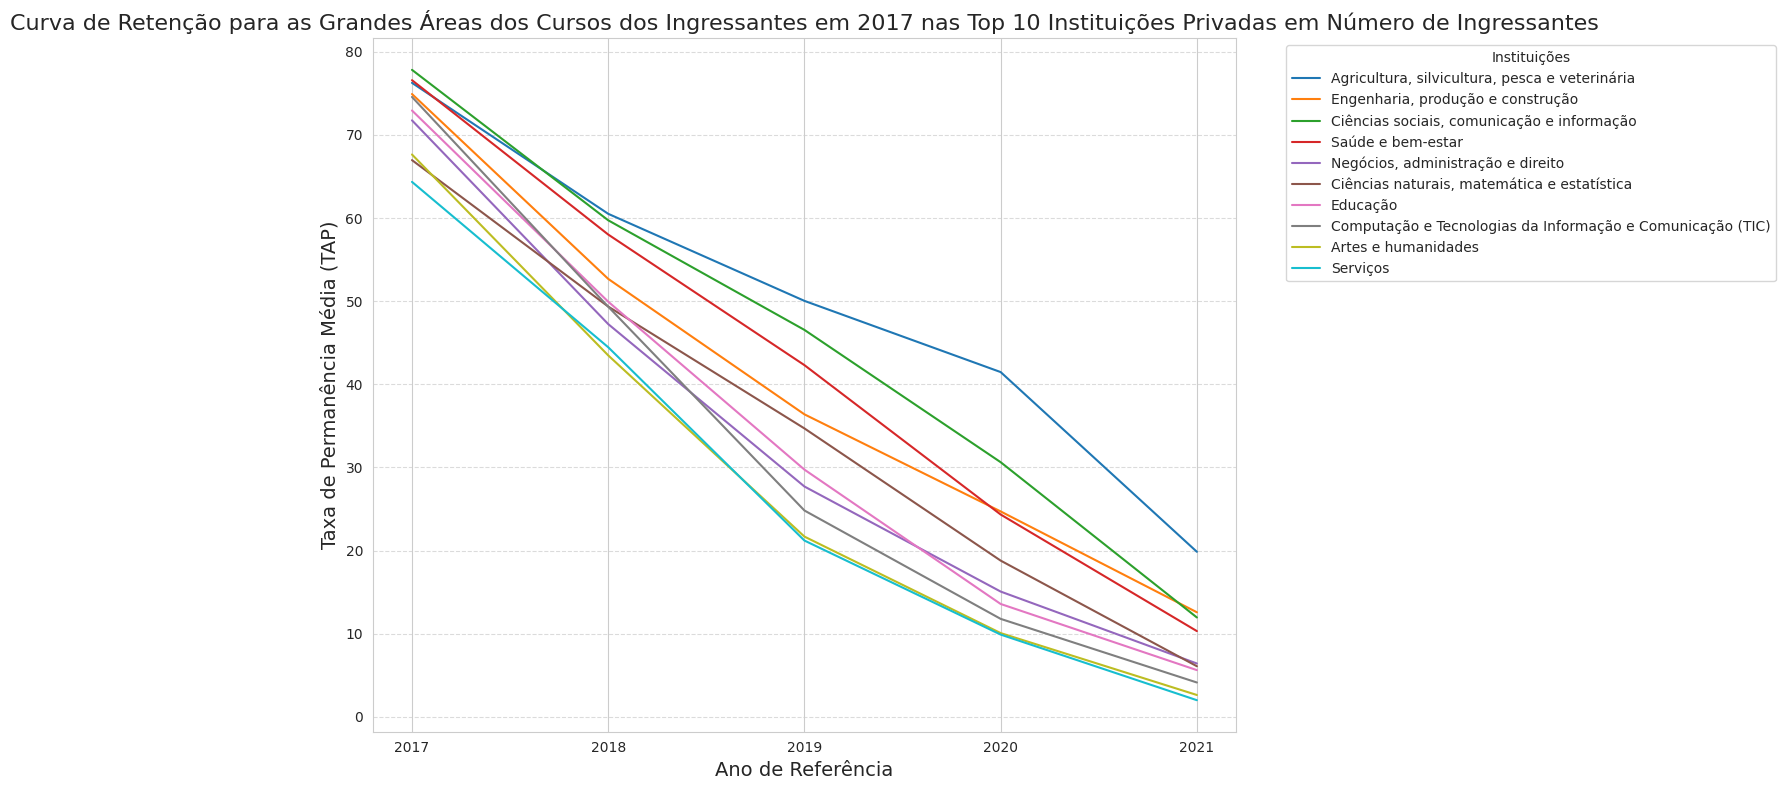

In [106]:
# Convertendo a coluna "Taxa de Permanência - TAP" para formato numérico após remover as vírgulas para todo o dataframe
# df['Taxa de Permanência - TAP'] = (df['Taxa de Permanência - TAP'].str.replace(',', '').astype(float)/10)

# Filtrar o conjunto de dados para instituições localizadas no sudeste e para o ano de ingresso 2017
sudeste_data_2017 = df[(df['Código da Região Geográfica do Curso'] == 3) & (df['Ano de Ingresso'] == 2017) & (df['Tipo de Instituição'] == 'Privada')]

# Identificar as 10 instituições com o maior número de ingressantes em 2017
top_10_institutions = sudeste_data_2017.groupby('Nome da Instituição').sum()['Quantidade de Ingressantes no Curso'].nlargest(10).index

# Filtrar o conjunto de dados original para essas 10 instituições
top_10_data = df[df['Nome da Instituição'].isin(top_10_institutions)]

# Calculando a Taxa de Permanência Média (TAP) para cada ano de referência para essas instituições
average_tap_per_year_top_10 = top_10_data.groupby(['Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Referência'])['Taxa de Permanência - TAP'].mean().unstack().sort_values(by=2021,ascending=False)

# Plotando as curvas de retenção para essas instituições em um único gráfico
plt.figure(figsize=(15, 8))

for institution in average_tap_per_year_top_10.index:
    average_tap_per_year_top_10.loc[institution].plot(label=institution)

# Definindo títulos, labels e legenda
plt.title("Curva de Retenção para as Grandes Áreas dos Cursos dos Ingressantes em 2017 nas Top 10 Instituições Privadas em Número de Ingressantes", fontsize=16)
plt.xlabel("Ano de Referência", fontsize=14)
plt.xticks(average_tap_per_year_top_10.columns.astype(int))
plt.ylabel("Taxa de Permanência Média (TAP)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Instituições", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [107]:
average_tap_per_year_top_10

Ano de Referência                                        2017       2018  \
Nome da Grande Área do Curso segundo a classifi...                         
Agricultura, silvicultura, pesca e veterinária      76.257143  60.507143   
Engenharia, produção e construção                   74.911699  52.680223   
Ciências sociais, comunicação e informação          77.820312  59.728125   
Saúde e bem-estar                                   76.578061  58.014286   
Negócios, administração e direito                   71.747289  47.243373   
Ciências naturais, matemática e estatística         66.965000  49.352500   
Educação                                            72.932143  49.937143   
Computação e Tecnologias da Informação e Comuni...  74.561161  49.335714   
Artes e humanidades                                 67.639259  43.479259   
Serviços                                            64.346602  44.459223   

Ano de Referência                                        2019       2020  \
Nome da Grande Área do Curso segundo a classifi...                         
Agricultura, silvicultura, pesca e veterinária      50.035714  41.471429   
Engenharia, produção e construção                   36.388579  24.711978   
Ciências sociais, comunicação e informação          46.542969  30.632031   
Saúde e bem-estar                                   42.305867  24.340816   
Negócios, administração e direito                   27.709639  15.075151   
Ciências naturais, matemática e estatística         34.695000  18.797500   
Educação                                            29.739643  13.582143   
Computação e Tecnologias da Informação e Comuni...  24.823214  11.790625   
Artes e humanidades                                 21.685185  10.079259   
Serviços                                            21.210680   9.900971   

Ano de Referência                                        2021  
Nome da Grande Área do Curso segundo a classifi...             
Agricultura, silvicultura, pesca e veterinária      19.857143  
Engenharia, produção e construção                   12.583287  
Ciências sociais, comunicação e informação          11.958594  
Saúde e bem-estar                                   10.319898  
Negócios, administração e direito                    6.423343  
Ciências naturais, matemática e estatística          6.092500  
Educação                                             5.626071  
Computação e Tecnologias da Informação e Comuni...   4.138393  
Artes e humanidades                                  2.634815  
Serviços                                             2.008738